# Assignment_Week 11

In [22]:
import numpy as np

### Load and normalize our data

In [23]:
from tensorflow.keras.datasets import mnist


# load MNIST data
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
print(train_images.shape)
print(test_images.shape)

# Flatten the images for a autoencoder input (28x28 is 784 -- therfore, input is 784 neurons)
train_images = np.reshape(train_images, (-1, 784))
test_images = np.reshape(test_images, (-1, 784))
print(train_images.shape)
print(test_images.shape)

# Normalize data - since it's grayscale, we can divide by 255 to get each pixel between 0 and 1
train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255

(60000, 28, 28)
(10000, 28, 28)
(60000, 784)
(10000, 784)


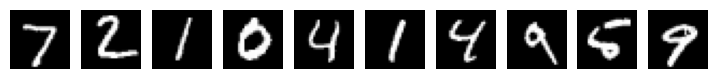

In [24]:
from matplotlib import pyplot as plt

n = 10
plt.figure(figsize=(9, 2))
for i in range(n):
  ax = plt.subplot(1, n, i+1)
  plt.imshow(test_images[i].reshape(28, 28), cmap="gray")
  ax.axis('off')

plt.show()

# Load our pretrained model

In [25]:
from tensorflow import keras

pretrained_model = keras.models.load_model(r'C:\DSP\WE_11\trained_autoencoder.h5')

### Test the autoencoder model by reconstructing the test images and visually inspecting the results.

313/313 [==============================] - 1s 4ms/step


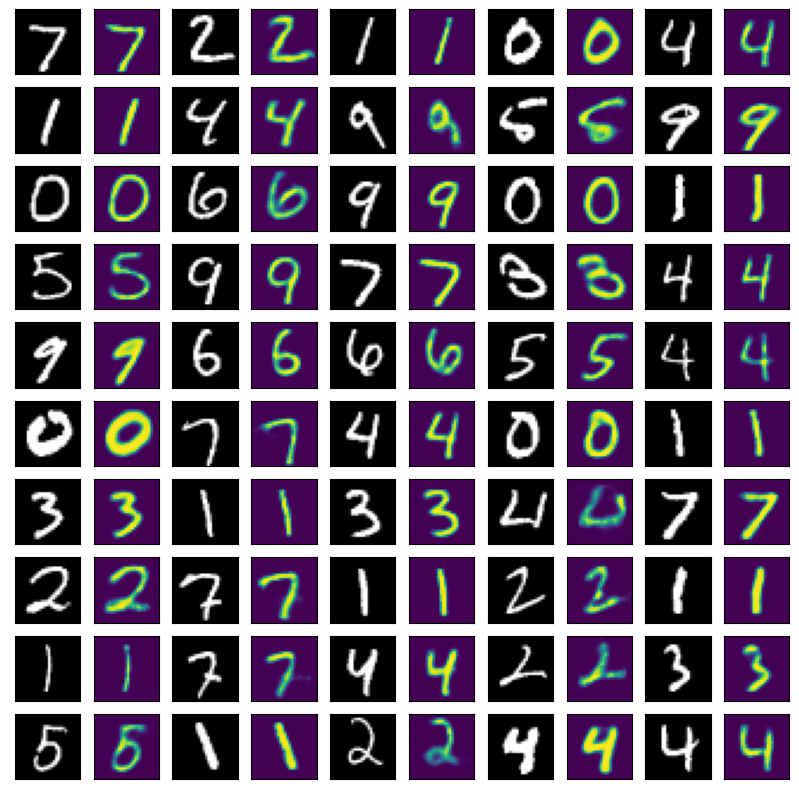

In [26]:
reconstructed_images = pretrained_model.predict(test_images)

images = []
for i in range(100):
    images.append(test_images[i].reshape(28,28))
    images.append(reconstructed_images[i].reshape(28,28))
rows = 10
cols = 10
plt.figure(figsize=(10,10))
for i in range(rows*cols):
    plt.subplot(rows,cols,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    if (i%2 == 0):
        plt.imshow(images[i],cmap='gray')
    else:
        plt.imshow(images[i])
plt.show()

In [27]:
from matplotlib import pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing import image

# loading image
P1 = tf.keras.utils.load_img(r"C:\DSP\WE_11\pic1.png", target_size=(28, 28), color_mode = "grayscale")

P2 = tf.keras.utils.load_img(r"C:\DSP\WE_11\pic2.png", target_size=(28, 28), color_mode = "grayscale")

P3 = tf.keras.utils.load_img(r"C:\DSP\WE_11\pic3.png", target_size=(28, 28), color_mode = "grayscale")

P4 = tf.keras.utils.load_img(r"C:\DSP\WE_11\pic4.png", target_size=(28, 28), color_mode = "grayscale")

P5 = tf.keras.utils.load_img(r"C:\DSP\WE_11\pic5.png", target_size=(28, 28), color_mode = "grayscale")

In [28]:
new_images = np.vstack([P1,P2,P3,P4,P5,])
test_p = new_images.reshape(-1, 784)
train_p = new_images.reshape(-1, 784)
train_p = train_p.astype('float32') /255
test_p = test_p.astype('float32') /255

In [29]:
train_p = np.repeat(train_p[:],25,axis=0)

In [30]:
train_p.shape

(125, 784)

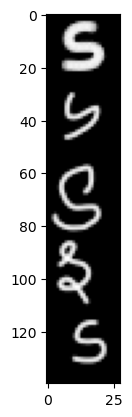

In [31]:
plt.imshow(new_images, cmap="gray")
ax.axis('off')

plt.show()

# Create an autoencoder model

In [32]:
from tensorflow.keras import Model, Input
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential

input_dim = 28*28
latent_vec_len = 784 # this is the 'bottleneck' of the autoencoder

# Define the autoencoder architecture
# build the encoder
autoencoder = Sequential()
autoencoder.add(Input(shape=(input_dim,)))
autoencoder.add(Dense(500, activation='relu'))
autoencoder.add(Dense(300, activation='relu'))
autoencoder.add(Dense(100, activation='relu'))

# the bottleneck layer
autoencoder.add(Dense(latent_vec_len, activation='relu'))

# the decoder layer
autoencoder.add(Dense(100, activation='relu'))
autoencoder.add(Dense(300, activation='relu'))
autoencoder.add(Dense(500, activation='relu'))
autoencoder.add(Dense(input_dim, activation='sigmoid'))

# Compile the autoencoder model
autoencoder.compile(loss='binary_crossentropy', optimizer='adam')

# Get summary
autoencoder.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 500)               392500    
                                                                 
 dense_9 (Dense)             (None, 300)               150300    
                                                                 
 dense_10 (Dense)            (None, 100)               30100     
                                                                 
 dense_11 (Dense)            (None, 784)               79184     
                                                                 
 dense_12 (Dense)            (None, 100)               78500     
                                                                 
 dense_13 (Dense)            (None, 300)               30300     
                                                                 
 dense_14 (Dense)            (None, 500)              

In [33]:
from tensorflow.keras.callbacks import EarlyStopping

Epoch 1/10
469/469 [==============================] - 15s 29ms/step - loss: 0.1791 - val_loss: 0.1300
Epoch 2/10
469/469 [==============================] - 13s 28ms/step - loss: 0.1155 - val_loss: 0.1097
Epoch 3/10
469/469 [==============================] - 13s 28ms/step - loss: 0.1023 - val_loss: 0.1019
Epoch 4/10
469/469 [==============================] - 13s 28ms/step - loss: 0.0953 - val_loss: 0.0959
Epoch 5/10
469/469 [==============================] - 13s 28ms/step - loss: 0.0912 - val_loss: 0.0916
Epoch 6/10
469/469 [==============================] - 13s 28ms/step - loss: 0.0881 - val_loss: 0.0894
Epoch 7/10
469/469 [==============================] - 14s 30ms/step - loss: 0.0859 - val_loss: 0.0880
Epoch 8/10
469/469 [==============================] - 13s 28ms/step - loss: 0.0844 - val_loss: 0.0877
Epoch 9/10
469/469 [==============================] - 13s 28ms/step - loss: 0.0832 - val_loss: 0.0863
Epoch 10/10
313/313 [==============================] - 2s 5ms/step


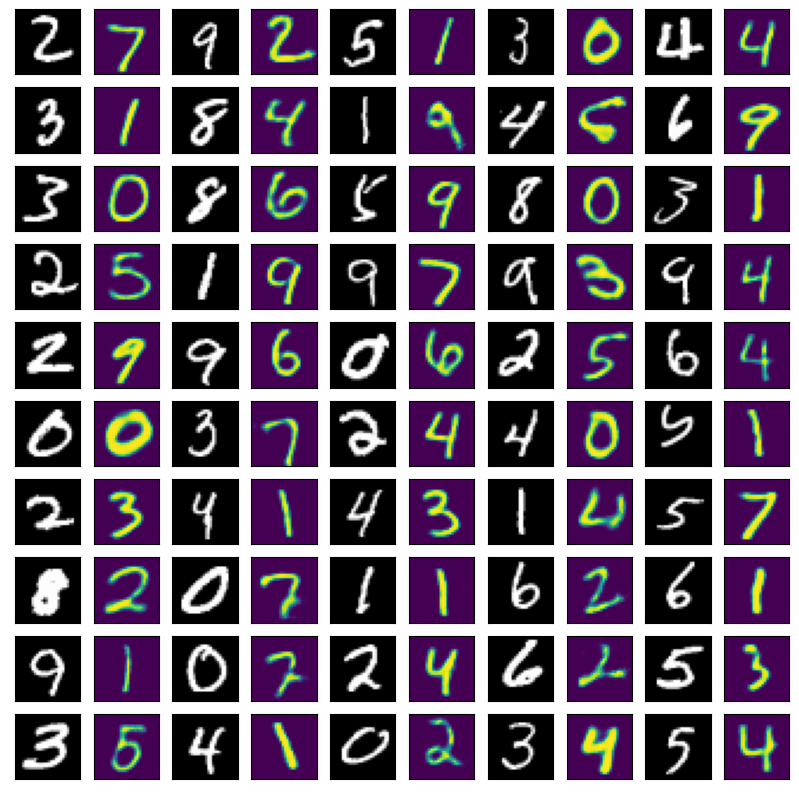

Epoch 1/10
469/469 [==============================] - 13s 28ms/step - loss: 0.0813 - val_loss: 0.0802
Epoch 2/10
469/469 [==============================] - 13s 28ms/step - loss: 0.0804 - val_loss: 0.0796
Epoch 3/10
469/469 [==============================] - 13s 28ms/step - loss: 0.0796 - val_loss: 0.0796
Epoch 4/10
469/469 [==============================] - 13s 28ms/step - loss: 0.0791 - val_loss: 0.0784
Epoch 5/10
469/469 [==============================] - 14s 29ms/step - loss: 0.0785 - val_loss: 0.0775
Epoch 6/10
469/469 [==============================] - 13s 28ms/step - loss: 0.0779 - val_loss: 0.0772
Epoch 7/10
469/469 [==============================] - 13s 29ms/step - loss: 0.0775 - val_loss: 0.0767
Epoch 8/10
469/469 [==============================] - 13s 28ms/step - loss: 0.0770 - val_loss: 0.0767
Epoch 9/10
469/469 [==============================] - 13s 29ms/step - loss: 0.0766 - val_loss: 0.0762
Epoch 10/10
313/313 [==============================] - 2s 6ms/step


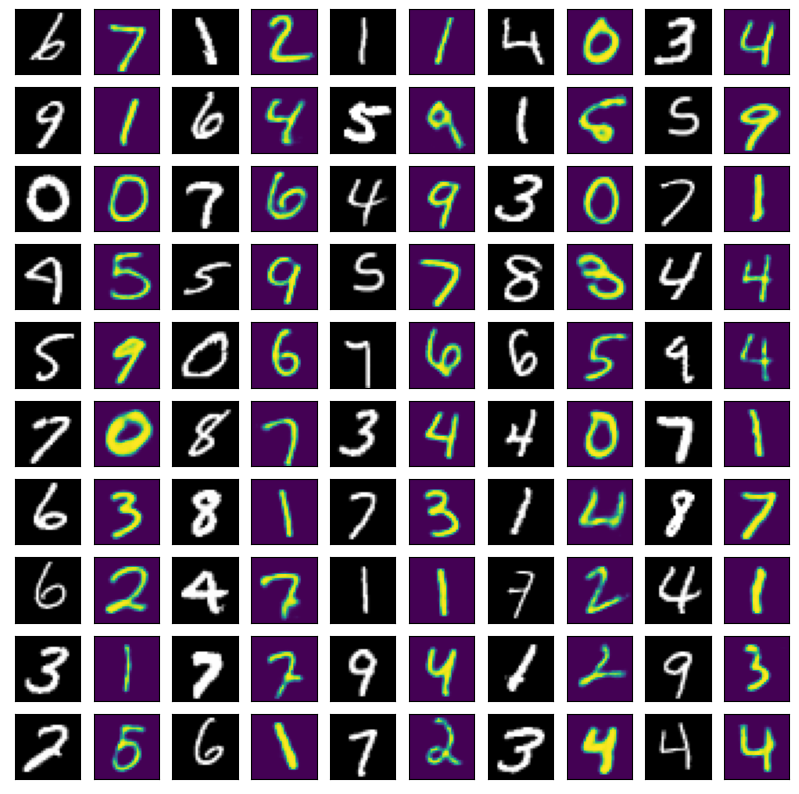

Epoch 1/10
469/469 [==============================] - 12s 26ms/step - loss: 0.0759 - val_loss: 0.0796
Epoch 2/10
469/469 [==============================] - 13s 27ms/step - loss: 0.0756 - val_loss: 0.0792
Epoch 3/10
469/469 [==============================] - 13s 28ms/step - loss: 0.0754 - val_loss: 0.0797
Epoch 4/10
469/469 [==============================] - 14s 29ms/step - loss: 0.0750 - val_loss: 0.0786
Epoch 5/10
469/469 [==============================] - 14s 29ms/step - loss: 0.0748 - val_loss: 0.0791
Epoch 6/10
469/469 [==============================] - 16s 33ms/step - loss: 0.0746 - val_loss: 0.0784
Epoch 7/10
469/469 [==============================] - 16s 34ms/step - loss: 0.0744 - val_loss: 0.0789
Epoch 8/10
469/469 [==============================] - 14s 31ms/step - loss: 0.0741 - val_loss: 0.0782
Epoch 9/10
469/469 [==============================] - 15s 31ms/step - loss: 0.0740 - val_loss: 0.0779
Epoch 10/10
313/313 [==============================] - 2s 5ms/step


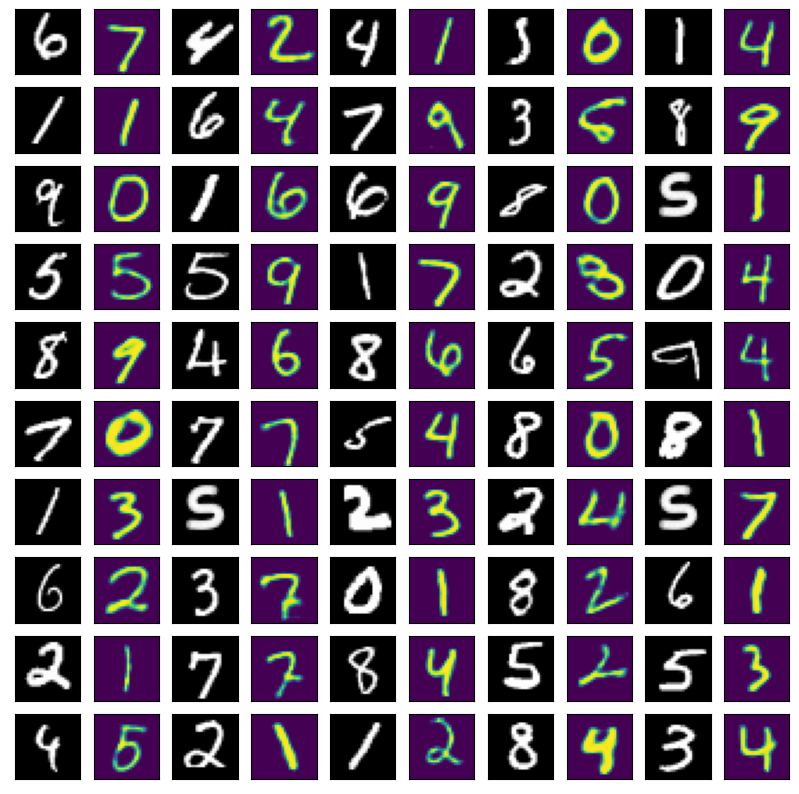

Epoch 1/10
469/469 [==============================] - 13s 27ms/step - loss: 0.0735 - val_loss: 0.0758
Epoch 2/10
469/469 [==============================] - 13s 28ms/step - loss: 0.0735 - val_loss: 0.0760
Epoch 3/10
469/469 [==============================] - 13s 28ms/step - loss: 0.0732 - val_loss: 0.0754
Epoch 4/10
469/469 [==============================] - 13s 29ms/step - loss: 0.0731 - val_loss: 0.0760
Epoch 5/10
469/469 [==============================] - 14s 29ms/step - loss: 0.0730 - val_loss: 0.0747
Epoch 6/10
469/469 [==============================] - 13s 28ms/step - loss: 0.0728 - val_loss: 0.0753
Epoch 7/10
469/469 [==============================] - 13s 28ms/step - loss: 0.0728 - val_loss: 0.0756
Epoch 8/10
469/469 [==============================] - 13s 28ms/step - loss: 0.0726 - val_loss: 0.0746
Epoch 9/10
469/469 [==============================] - 13s 27ms/step - loss: 0.0724 - val_loss: 0.0750
Epoch 10/10
313/313 [==============================] - 1s 5ms/step


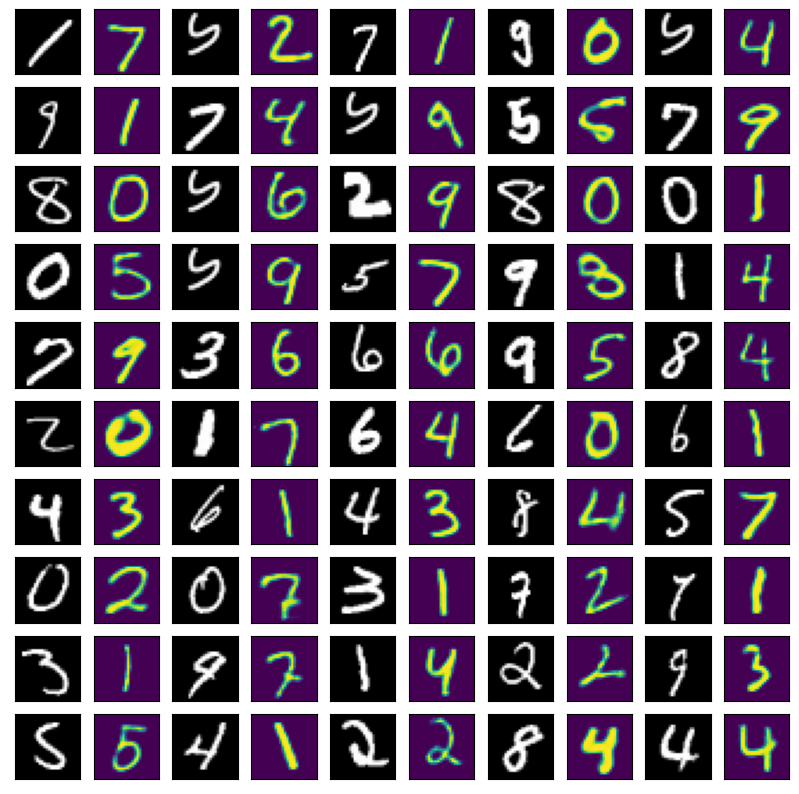

Epoch 1/10
469/469 [==============================] - 12s 26ms/step - loss: 0.0722 - val_loss: 0.0826
Epoch 2/10
469/469 [==============================] - 13s 28ms/step - loss: 0.0722 - val_loss: 0.0831
Epoch 3/10
469/469 [==============================] - 13s 28ms/step - loss: 0.0721 - val_loss: 0.0829
Epoch 4/10
469/469 [==============================] - 13s 28ms/step - loss: 0.0720 - val_loss: 0.0828
Epoch 5/10
469/469 [==============================] - 13s 28ms/step - loss: 0.0719 - val_loss: 0.0837
Epoch 6/10
469/469 [==============================] - 13s 28ms/step - loss: 0.0718 - val_loss: 0.0828
Epoch 7/10
469/469 [==============================] - 13s 29ms/step - loss: 0.0718 - val_loss: 0.0831
Epoch 8/10
469/469 [==============================] - 13s 28ms/step - loss: 0.0717 - val_loss: 0.0830
Epoch 9/10
469/469 [==============================] - 13s 28ms/step - loss: 0.0716 - val_loss: 0.0835
Epoch 10/10
313/313 [==============================] - 2s 5ms/step


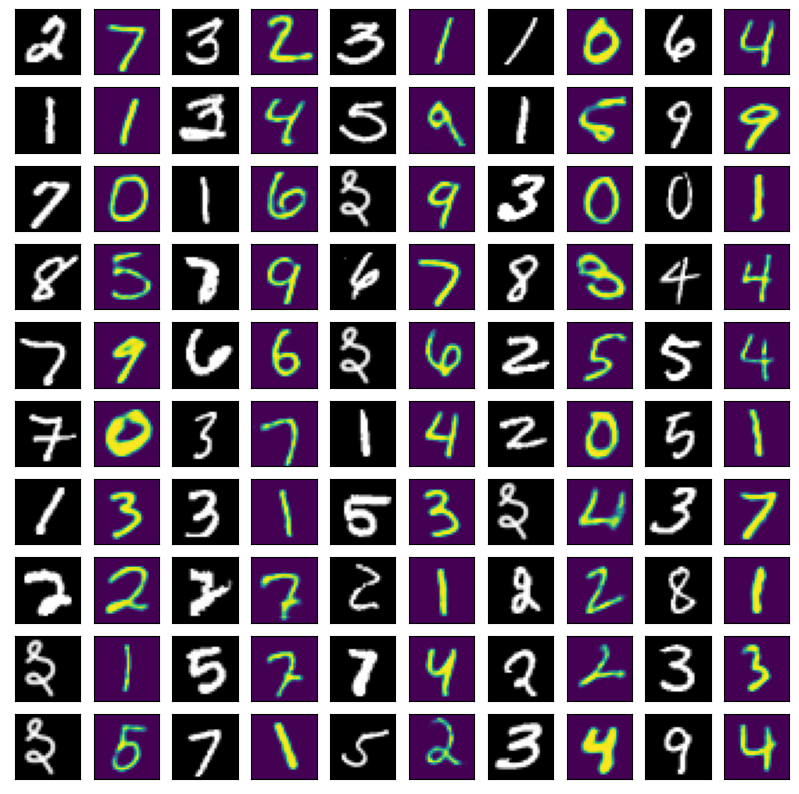

In [34]:
for i in range(5):
    if i >= len(train_p):
        break

    input_arr = train_p[i]

    input_arr = input_arr.reshape(784)

    np.random.shuffle(train_p)

    bad_images = [input_arr for _ in range(135)]
    new_image_set = np.vstack((train_images[:2500], bad_images))
    np.random.shuffle(new_image_set)

    new_images_train = new_image_set[int(len(new_image_set)*.8):]
    new_images_test = new_image_set[int(len(new_image_set)*.2):]

    # Train the autoencoder with MNIST data
    early_stop = EarlyStopping(monitor='loss', patience=3, verbose=1)
    history = autoencoder.fit(
        x=train_images, # For autoencoders, both the input and the target are the same
        y=train_images, 
        epochs=10, 
        batch_size=128,
        shuffle=True, 
        validation_data=(new_images_test, new_images_test),
        callbacks=[early_stop]
    )
    reconstructed_images = autoencoder.predict(test_images)

    images = []
    for i in range(100):
        images.append(new_images_test[i].reshape(28,28))
        images.append(reconstructed_images[i].reshape(28,28))
    rows = 10
    cols = 10
    plt.figure(figsize=(10,10))
    for i in range(rows*cols):
        plt.subplot(rows,cols,i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        if (i%2 == 0):
            plt.imshow(images[i],cmap='gray')
        else:
            plt.imshow(images[i])
    plt.show()

In [35]:
autoencoder.save(r'C:\DSP\WE_11\Final output autoencoder.h5')

As per the results above we can clearly say that after running mnist dataset and Images together the model we used is not able to predict the images as expected.